In [86]:
import numpy as np, pandas as pd
import datetime
import requests
from collections import defaultdict

In [5]:
from dotenv import load_dotenv

load_dotenv()  # take environment variables from .env.

True

In [6]:
import data.polygon

In [134]:
df_summary = pd.read_csv("data/bear_cave_summary_anakin.csv")

In [23]:
df_summary

,episode,date,ticker,researcher
0,123,2023-01-20,GNRC,Spruce Point Capital
1,122,2022-06-19,EBIX,Hindenburg Research
2,121,2022-06-12,AMRC,Jehoshaphat Research
3,120,2022-06-05,ENOB,Hindenburg Research
4,120,2022-06-05,LWLG,Kerrisdale Capital
...,...,...,...,...
143,32,2020-09-21,PDCO,Bucephalus Research
144,32,2020-09-21,LL,Whitney Tilson
145,31,2020-09-14,NKLA,Hindenburg Research
146,31,2020-09-14,NAK,J Capital Research


In [24]:
data.polygon.polygon_url_to_dataframe(data.polygon.get_polygon_range_query_url("GOOG", "2024-02-03", "2024-02-10"))

,v,vw,o,c,h,l,n
t,,,,,,,
2024-02-05 00:00:00-05:00,29254444.0,145.2150,144.04,144.93,146.670,143.9100,342883
2024-02-06 00:00:00-05:00,21517655.0,145.4096,145.96,145.41,146.740,144.5200,240631
2024-02-07 00:00:00-05:00,21436126.0,146.3970,146.12,146.68,147.000,145.2103,236932
2024-02-08 00:00:00-05:00,18241319.0,147.1074,146.97,147.22,147.610,146.4200,191624
2024-02-09 00:00:00-05:00,21877693.0,149.7306,147.95,150.22,150.695,147.4300,241601


In [62]:
for _, row in df_summary.iterrows():
    print(row)

    break

episode                        123
date                    2023-01-20
ticker                        GNRC
researcher    Spruce Point Capital
Name: 0, dtype: object


In [77]:
def get_df_ticker_history(ticker, start_date_str):
    today_str = datetime.datetime.now().strftime("%Y-%m-%d")
    df = data.polygon.polygon_url_to_dataframe(data.polygon.get_polygon_range_query_url(ticker, start_date_str, today_str))
    if df.empty:
        print(f'{ticker} with {start_date_str} df_history is empty')
        return None
    df_c = df[['c']].copy()
    df_c['ticker'] = ticker
    df_c['value'] = df_c.c / df_c.c.iloc[0]
    return df_c

In [89]:
ticker_date = {}
for _, row in df_summary.iterrows():
    if row.ticker in ticker_date: continue
    ticker_date[row.ticker] = row.date

In [92]:
dfs = []
for ticker, start_date_str in ticker_date.items():
    df_ticker_history = get_df_ticker_history(ticker, start_date_str)
    if df_ticker_history is None: continue
    dfs.append(df_ticker_history)
df_tickers_history = pd.concat(dfs)

AVZ df_history is empty
ADJ df_history is empty
VUL df_history is empty
BIN df_history is empty
EPA df_history is empty
TYR df_history is empty
NETW df_history is empty
S30 df_history is empty
WTC df_history is empty
GLJ df_history is empty


In [99]:
df_tickers_history_ticker_as_column = df_tickers_history.pivot(columns=['ticker'], values=['value'])

In [93]:
df_tickers_history

,c,ticker,value
t,,,
2023-01-20 00:00:00-05:00,108.4900,GNRC,1.000000
2023-01-23 00:00:00-05:00,116.0500,GNRC,1.069684
2023-01-24 00:00:00-05:00,114.3900,GNRC,1.054383
2023-01-25 00:00:00-05:00,111.2100,GNRC,1.025071
2023-01-26 00:00:00-05:00,112.9700,GNRC,1.041294
...,...,...,...
2023-10-25 00:00:00-04:00,0.6500,NLS,0.043018
2023-10-26 00:00:00-04:00,0.6800,NLS,0.045003
2023-10-27 00:00:00-04:00,0.6600,NLS,0.043680


In [100]:
df_tickers_history_ticker_as_column

value                                          \
ticker                         ACMR      AEYE       AMR      AMRC      ATRC   
t                                                                             
2020-09-14 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-15 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-16 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-17 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-18 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2024-07-29 00:00:00-04:00  0.708060  1.754386  1.741978  0.675387  0.560776   
2024-07-30 00:00:00-04:00  0.669495  1.591943  1.701125  0.671681  0.561798   
2024-07-31 00:00:00-04:00  0.692248  1.626381  1.749023  0.688249  0.550817   
2024-08-01 00:00:00-04:00  0.627459  1.539311  1.649201  0.633312  0.537283   
2024-08-02 00:00:00-04:00  0.603162  1.463938  1.542451  0.597558  0.563075   

                                                                             \
ticker                          AVY        AZ      BEEM      BGXX      BLNK   
t                                                                             
2020-09-14 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-15 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-16 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-17 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-18 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2024-07-29 00:00:00-04:00  1.395216  0.157277  0.102843  0.044370  0.063846   
2024-07-30 00:00:00-04:00  1.414024  0.162128  0.098619  0.049134  0.061154   
2024-07-31 00:00:00-04:00  1.420904  0.170191  0.098944  0.049213  0.063269   
2024-08-01 00:00:00-04:00  1.402687  0.170213  0.093258  0.046063  0.058846   
2024-08-02 00:00:00-04:00  1.378637  0.160213  0.085459  0.045906  0.054423   

                           ...                                          \
ticker                     ... TWTR      VERU      VUZI      WKHS WRTC   
t                          ...                                           
2020-09-14 00:00:00-04:00  ...  NaN       NaN       NaN       NaN  NaN   
2020-09-15 00:00:00-04:00  ...  NaN       NaN       NaN       NaN  NaN   
2020-09-16 00:00:00-04:00  ...  NaN       NaN       NaN       NaN  NaN   
2020-09-17 00:00:00-04:00  ...  NaN       NaN       NaN       NaN  NaN   
2020-09-18 00:00:00-04:00  ...  NaN       NaN       NaN       NaN  NaN   
...                        ...  ...       ...       ...       ...  ...   
2024-07-29 00:00:00-04:00  ...  NaN  0.115485  0.140766  0.002803  NaN   
2024-07-30 00:00:00-04:00  ...  NaN  0.112037  0.132883  0.002765  NaN   
2024-07-31 00:00:00-04:00  ...  NaN  0.114871  0.137387  0.002746  NaN   
2024-08-01 00:00:00-04:00  ...  NaN  0.109092  0.134009  0.002521  NaN   
2024-08-02 00:00:00-04:00  ...  NaN  0.102994  0.127252  0.002427  NaN   

                                                                       
ticker                          WSC  XL        YY        ZI       ZUO  
t                                                                      
2020-09-14 00:00:00-04:00       NaN NaN       NaN       NaN       NaN  
2020-09-15 00:00:00-04:00       NaN NaN       NaN       NaN       NaN  
2020-09-16 00:00:00-04:00       NaN NaN       NaN       NaN       NaN  
2020-09-17 00:00:00-04:00       NaN NaN       NaN       NaN       NaN  
2020-09-18 00:00:00-04:00       NaN NaN       NaN       NaN       NaN  
...                             ...  ..       ...       ...       ...  
2024-07-29 00:00:00-04:00  1.195721 NaN  0.382147  0.292324  0.876923  
2024-07-30 00:00:00-04:00  1.184157 NaN  0.378644  0.299044

In [123]:
df_tickers_history_ticker_as_column.loc['2024-08-02 00:00:00-04:00'].sort_values().shape

(97,)

In [124]:
df_tickers_history_ticker_as_column.loc['2024-08-02 00:00:00-04:00'].sort_values().dropna()[:10]

       ticker
value  NXTP      0.000047
       MNTS      0.000982
       WKHS      0.002427
       IBIO      0.003368
       NKLA      0.009572
       LPSN      0.021138
       PLUG      0.029516
       MPLN      0.039459
       LL        0.040887
       LAZR      0.040967
Name: 2024-08-02 00:00:00-04:00, dtype: float64

In [130]:
df_tickers_history_ticker_as_column.loc['2024-08-02 00:00:00-04:00'].sort_values(ascending=False).dropna()[:10]

       ticker
value  CELH      5.314370
       LRN       3.392130
       PHM       2.978073
       FRHC      1.740277
       NVEE      1.619336
       AMR       1.542451
       PDFS      1.476450
       AEYE      1.463938
       IONQ      1.393701
       AVY       1.378637
Name: 2024-08-02 00:00:00-04:00, dtype: float64

In [126]:
df_tickers_history_ticker_as_column.loc['2024-08-02 00:00:00-04:00'].sort_values().dropna().mean()

0.5591603419795136

<AxesSubplot:xlabel='t'>

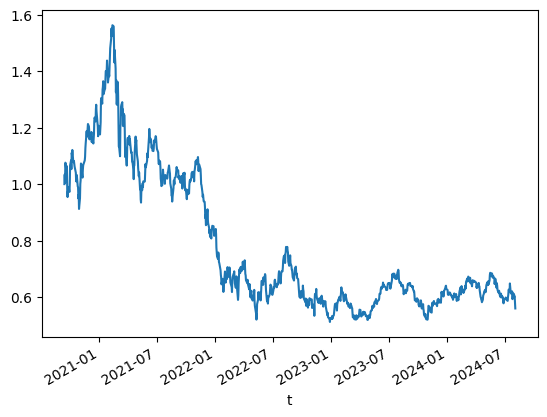

In [133]:
df_tickers_history_ticker_as_column.mean(axis=1).plot()

<AxesSubplot:xlabel='t'>

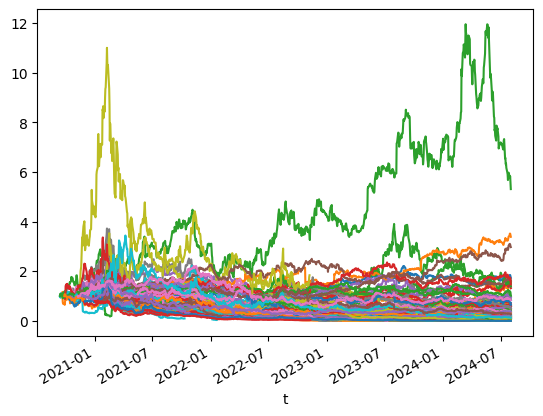

In [101]:
df_tickers_history_ticker_as_column.plot(legend=False)

<AxesSubplot:xlabel='t'>

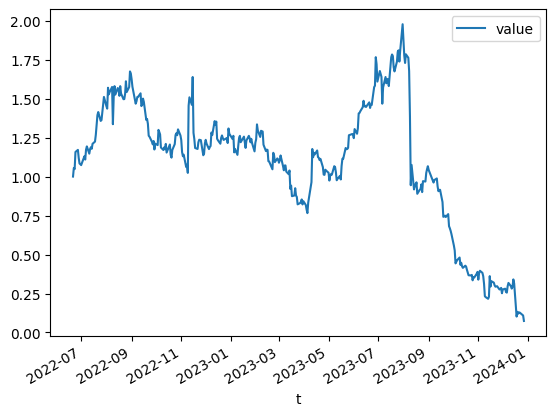

In [59]:
ticker, start_date_str = "EBIX", "2022-06-19"

today_str = datetime.datetime.now().strftime("%Y-%m-%d")
df = data.polygon.polygon_url_to_dataframe(data.polygon.get_polygon_range_query_url(ticker, start_date_str, today_str))[['c']].copy()
df['ticker'] = ticker
df['value'] = df.c / df.c.iloc[0]
df[['value']].plot()